In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data = data.drop('User ID', axis=1)


In [6]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [33]:
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [7]:
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_dt = dt_model.predict(X_test)

In [35]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [36]:
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

Decision Tree Accuracy: 84.00%


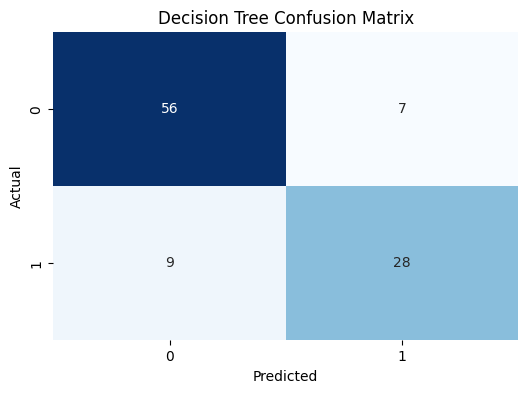

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



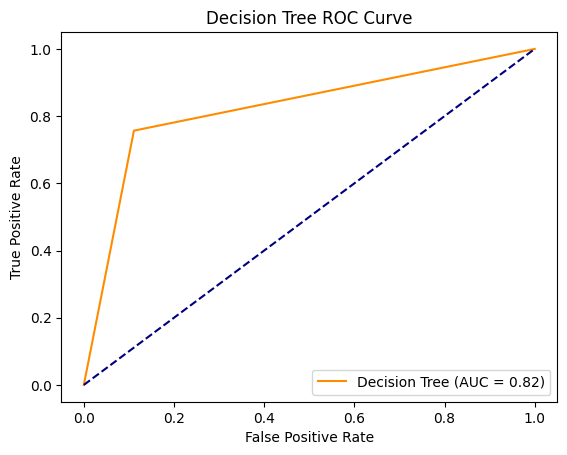

In [41]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, color='darkorange', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

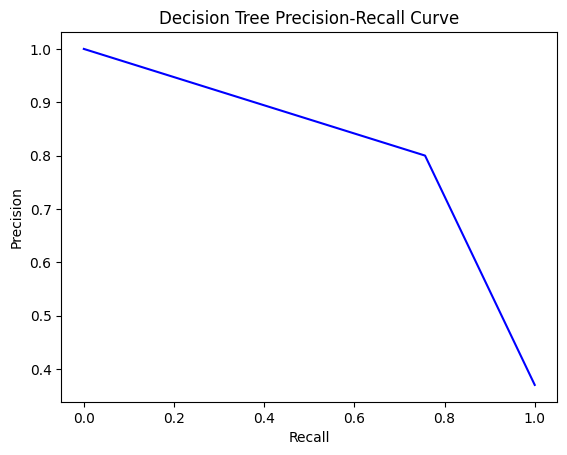

In [21]:
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_dt)
plt.plot(recall_dt, precision_dt, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.show()

In [22]:
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {f1_dt:.2f}")

Decision Tree F1 Score: 0.78


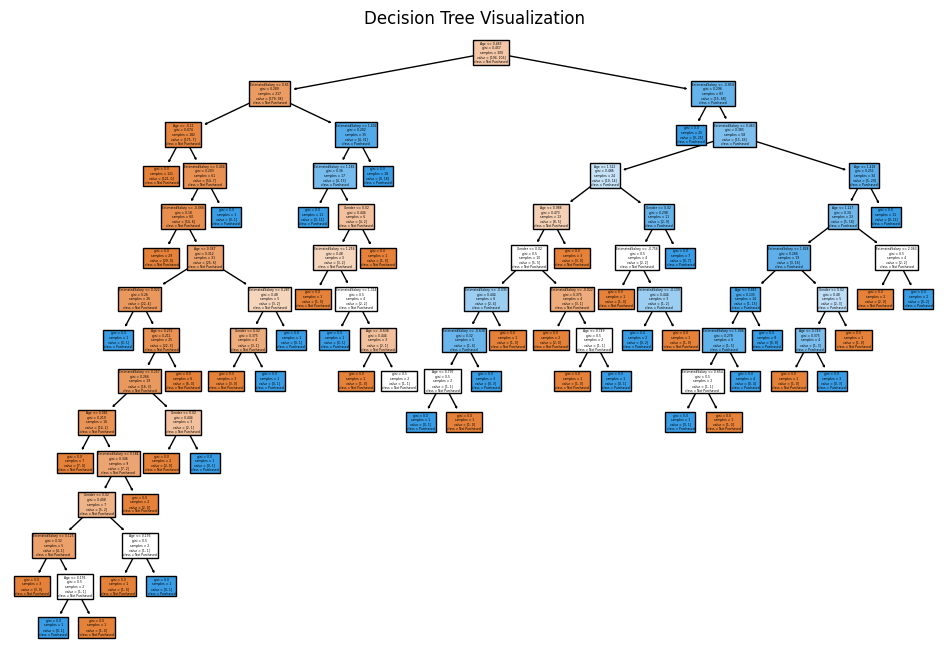

In [43]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=['Gender', 'Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

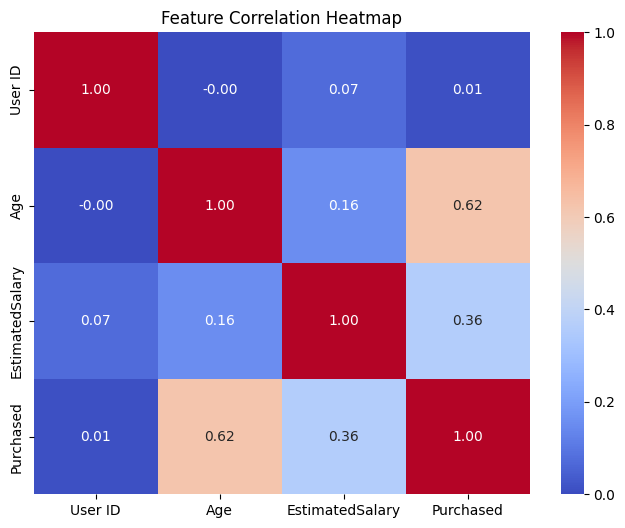

In [47]:
plt.figure(figsize=(8, 6))
# Remove non-numeric columns before calculating correlation.
corr = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [44]:
fig = px.scatter(data, x='Age', y='EstimatedSalary', color='Purchased', title="Age vs Estimated Salary (Purchased)")
fig.show()

In [46]:
cv_scores_dt = cross_val_score(dt_model, X_scaled, y, cv=10)
print(f"Decision Tree Cross-Validation Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean() * 100:.2f}%")

Decision Tree Cross-Validation Scores: [0.85  0.75  0.925 0.85  0.95  0.85  0.8   0.85  0.75  0.8  ]
Mean CV Score: 83.75%


In [49]:
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {f1_dt:.2f}")

Decision Tree F1 Score: 0.78
